In [234]:
%config InlineBackend.figure_format = 'svg'

(3)=
# Chapter 3: Plotting with Matplotlib

Data visualization is an important part of scientific computing both in analyzing your data and in supporting your conclusions. There are a variety of plotting libraries available in Python, but the one that stands out from the rest is matplotlib. Matplotlib is a core scientific Python library because it is powerful and can generate nearly any plot a user may need. The main drawback is that it is often verbose. That is to say, anything more complex than a very basic plot may require a few lines of boilerplate code to create. This chapter introduces plotting with matplotlib.

```{index} alias
```

Before the first plot can be created, we must first import matplotlib using the code below. This imports the  `pyplot` module which does much of the basic plotting in matplotlib. While the `plt` alias is not required, it is a common convention in the SciPy community and is highly recommended as it will save you a considerable amount of typing. You may sometimes also see a `%matplotlib inline` line. This used to be required to ensure the plots appeared in the notebook but is now typically not necessary.

In [235]:
import matplotlib.pyplot as plt

In all the examples below, simply calling a plotting function in a Jupyter notebook will automatically make the plot appear in the notebook below the plotting function. However, if you choose to use matplotlib in some other environment, it is often necessary to also execute the following `plt.show()` function to make the plot appear. This can also be done in Jupyter, but it is not shown in the rest of this chapter as Jupyter does not require it.

In [236]:
plt.show()

(3.1)=
## 3.1 Plotting Basics

Before creating our first plot, we need some data to plot, so we will generate data points from orbital radial wave functions. The following equation defines the wave function ($\psi$) for the 3s atomic orbital of hydrogen with respect to atomic radius ($r$) in Bohrs ($a_0$).

$$ \psi_{3s} = \frac{2\sqrt{3}}{27}(\frac{2}{9}r^2 - 2r + 3)e^{-r/3} $$

We will generate points on this curve using a method called list comprehension covered in section [2.1.2](2.1.2). In the examples below, `r` is the distance from the nucleus and `psi_3s` is the wave function. If you choose to plot something else, just make two lists or tuples of the same length containing the $x$- and $y$-values.

In [237]:
# create Python function for generating 3s radial wave function
import math

def orbital_3S(r):
    wf = ((2*math.sqrt(3))/27)*((2/9)*r**2 - 2*r + 3)* math.exp(-r/3)
    return wf

In [238]:
# generate data to plot
r = [num / 4 for num in range(0, 150, 3)]
psi_3s = [orbital_3S(num) for num in r]

(3.1.1)=
### 3.1.1 First Plot

To visualize the 3s wave functions, we will call the `plot()` function, which is a general-purpose function for plotting. The `r` and `psi_3s` data are fed into it as positional arguments as the $x$- and $y$-variables, respectively. 

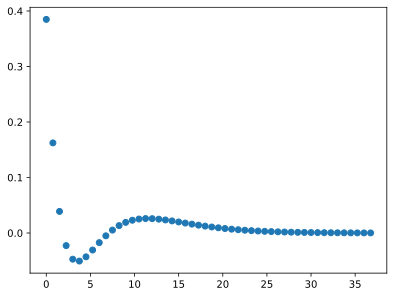

In [239]:
plt.plot(r, psi_3s, 'o');

````{margin}
```{tip}
You may have noticed a line of text above the plot that looks something like `[<matplotlib.lines.Line2D at 0x7f83318383a0>]`. If it bothers you, you can suppress it by either ending the line of code with a semicolon (`;`) or adding a line with `plt.show()`.
```
````

By default, matplotlib creates a scatter plot using blue as the default color. This can be modified if blue circles are not to your taste. If the `plot()` function is only provided a single argument, matplotlib assumes the data are the $y$-values and plots them against their indices.

```{index} single: plotting; colors
```
```{index} single: plotting; markers
```
(3.1.2)=
### 3.1.2 Markers and Color

To change the color and markers, you can add a few extra arguments: `marker`, `linestyle`, and `color`. All of these keyword arguments take strings.  The `marker` argument allows the user to choose from a list of markers (Table 1). The `linestyle` argument (Table 2) determines if a line is solid or the type of dashing that occurs, and the `color` argument (Table 3) allows the user to dictate the color of the line/markers. If an empty string is provided to `linestyle` or `marker`, no line or marker, respectively, is included in the plot. See the [matplotlib website](https://matplotlib.org/) for a more complete list of styles.

**Table 1** Common Matplotlib Marker Styles

| Argument | Description |
|:-------: | :--------:  |
| 'o'      |  circle |
| '*'    | star |
| 'p'    | pentagon |
| '^'    | triangle |
| 's'    | square   |


**Table 2** Common Matplotlib Line Styles

| Argument | Description |
|:-------: | :---------: |
|  '-'   | solid |
| '--'   | dashed |
| '-.'   | dash-dot |
| ':'    | dotted |

**Table 3** Common Matplotlib Colors

| Argument | Description |
|:------: | :--------: |
| 'b' | blue |
| 'r' | red  |
| 'k' | black (key) |
| 'g' | green |
| 'm' | magenta |
| 'c' | cyan |
| 'y' | yellow |


There are numerous other arguments that can be placed in the plot command. A few common, useful ones are shown below in Table 4.

**Table 4** A Few Common plot Keyword Arguments

| Argument | Description |
|:------:  | :--------:  |
|`linestyle` or `ls` | line style |
| `marker` | marker style |
|`linewidth` or `lw` | line width |
|`color` or `c` | line color |
|`markeredgecolor` or `mec` | marker edge color |
|`markerfacecolor` or `mfc` | marker color |
|`markersize` or `ms` | marker size |

Now that you have seen the keyword argument approach which allows for the fine-tuning of plots, there is also a shortcut useful for basic plots. The plot function can take a third, positional argument which makes plotting a lot quicker. If you place a string with a marker style and/or line style, you can adjust the color and markers without the full keyword arguments. This approach does not allow the user as much control as the keyword arguments, but it is popular because of its brevity.

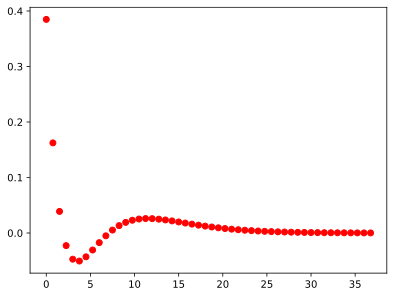

In [240]:
# ro = red circle
plt.plot(r, psi_3s, 'ro');

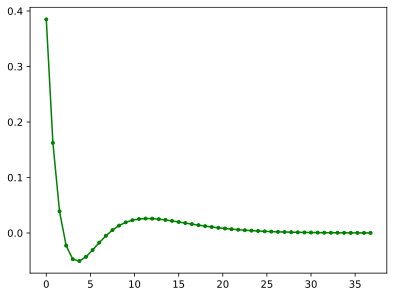

In [241]:
# g.- = green solid line with dots along it
plt.plot(r, psi_3s, 'g.-');

```{index} label plotting axes
```
(3.1.3)=
### 3.1.3 Labels

It is often important to label the axes of your plot. This is accomplished using the `plt.xlabel()` and `plt.ylabel()` functions which are placed on different lines as the `plt.plot()` function. Both functions take strings.

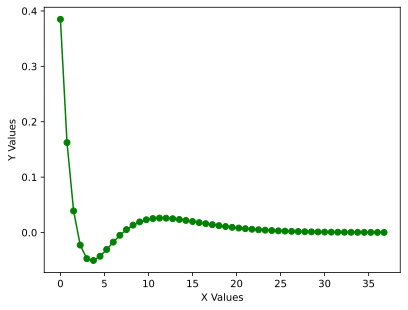

In [242]:
plt.plot(r, psi_3s, 'go-')
plt.xlabel('X Values')
plt.ylabel('Y Values');

```{index} title on plot
```

In the event you want a title at the top of your plots, you can add one using the `plt.title()` argument. To add symbols to the axes, this can be done using LaTeX commands which are used below, but discussion of LaTeX is beyond the scope of this chapter.

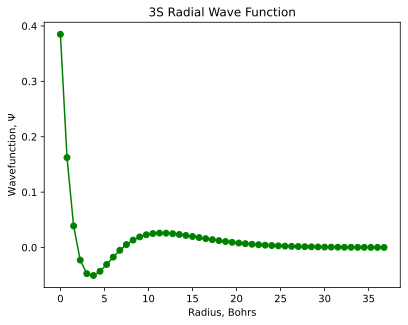

In [243]:
plt.plot(r, psi_3s, 'go-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.title('3S Radial Wave Function');

````{margin}
```{tip}
There are times when you may want to reverse the direction of an axis so that the numbering runs from large to small. Add the extra code lines `plt.gca().invert_xaxis()` and `plt.gca().invert_yaxis()` to reverse the *x*-axis and *y*-axis, respectively. Alternatively, you can just specify your axis limits in the reverse order using `plt.xlim(nlarge, nsmall)` and `plt.ylim(nlarge, nsmall)`.
```
````

```{index} single: plotting; figure size
```
(3.1.4)=
### 3.1.4 Figure Size

If you want to change the size or dimensions of the figure in the Jupyter notebook, this can be accomplished by `plt.figure(figsize=(width, height))`. It is important that this function be *above* the actual plotting function and not below for it to modify the figure.

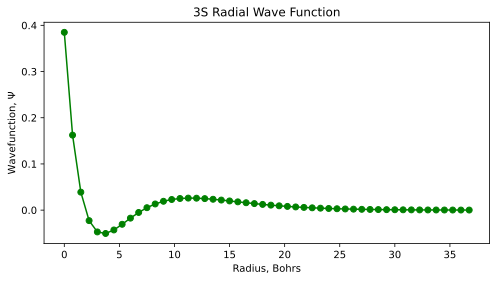

In [244]:
plt.figure(figsize=(8,4))
plt.plot(r, psi_3s, 'go-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.title('3S Radial Wave Function');

(3.1.5)=
### 3.1.5 Saving Figures

```{index} single: plotting; saving plots
```
```{index} saving plots
```

A majority of matplotlib usage is to generate figures in a Jupyter notebook. However, there are times when it is necessary to save the figures to files for a manuscript, report, or presentation. In these situations, you can save your plot using the `plt.savefig()` function which takes a few arguments. The first and only required argument is the name of the output file as a string. Following this, the user can also choose the resolution in dots per inch using the `dpi` keyword argument. Finally, there are a number of file formats supported by the `plt.savefig()` function including PNG, TIF, JPG, PDF, SVG, among others. The formats can be selected using the `format` argument which also takes a string, and if no format is explicitly chosen, matplotlib defaults to PNG.

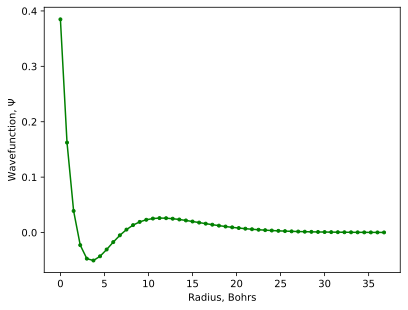

In [245]:
plt.plot(r, psi_3s, 'g.-')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.savefig('my_image.png', format='PNG', dpi=600);

````{margin}
```{note}
If you do not see your output image file, be sure that you are looking in the current working directory, which is likely the same folder as your Jupyter notebook. See [section 2.4.1](2.4.1) for using the `os` module to change directories.
```
````

(3.2)=
## 3.2 Plotting Types

Matplotlib supports a wide variety of plotting types including scatter plots, bar plots, histograms, pie charts, stem plots, and many others. A few of the most common ones are introduced below. For additional plotting types, see the [matplotlib website](https://matplotlib.org/stable/plot_types/index.html).

```{index} single: plotting; bar plot
```
(3.2.1)=
### 3.2.1 Bar Plots

Bar plots, despite looking very different, are quite similar to scatter plots. They both show the same information except that instead of the vertical position of a marker showing the magnitude of a $y$-value, it is represented by the height of a bar. Bar plots are generated using the `plt.bar()` function. Similar to the `plt.plot()` function, the bar plot takes $x$- and $y$-values as positional arguments, and if only one argument is given, the function assumes it is the $y$-variables and plots the values with respect to the index values.

The atomic numbers (`AN`) for the first ten chemical elements are generated below using list comprehension introduced in [section 2.1.2](2.1.2) to be plotted with the molecular weights (`MW`).

In [246]:
AN = [x + 1 for x in range(10)]
MW = [1.01, 4.04, 6.94, 9.01, 10.81, 12.01, 14.01, 16.00, 19.00, 20.18]

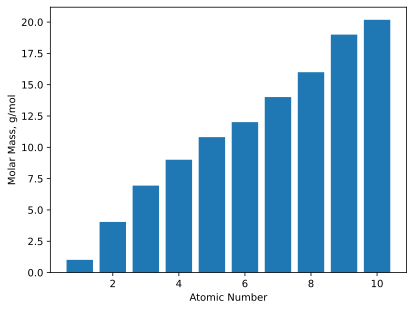

In [247]:
plt.bar(AN, MW)
plt.xlabel('Atomic Number')
plt.ylabel('Molar Mass, g/mol');

The bar plot characteristics can be adjusted like most other types of plots in matplotlib. The main arguments you will probably want to adjust are color and width, but some other arguments are provided in Table 5. The color arguments are consistent with the `plt.plot()` colors from earlier. The error bar arguments can take either a single value to display homogeneous error bars on all data points or can take a multi-element object (e.g., a list or tuple) containing the different margins of uncertainty for each data point. 

**Table 5** A Few Common plot Keyword Arguments

| Argument | Description |
|:-------: | :--------:  |
| `width` | bar width |
| `color` | bar color |
| `edgecolor` | bar edge color |
| `xerr` | X error bar |
| `yerr` | Y error bar |
| `capsize` | caps on error bars |


```{index} single: plotting; scatter plot
```
(3.2.2)=
### 3.2.2 Scatter Plots

We have already generated scatter plots using the `plt.plot()` function, but they can also be created using the `plt.scatter()` function. The latter is partially redundant, but unlike `plt.plot()`, `plt.scatter()` allows for different sizes, shapes, and colors of individual markers using the `s=`, `marker=`, and `c=` keyword arguments, respectively. See [section 3.1.2](3.1.2) for a short list of some of the marker shapes and colors available. Links to more complete lists can be found in the [Further Reading](fr03) section.

In the example below, we are loading the famous [wine dataset](https://archive.ics.uci.edu/ml/datasets/wine) that describes wine samples through a number of measurements including alcohol content, magnesium levels, color, etc. For convenience, we will load the dataset using the scikit-learn library introduced in [section 13.2.2](13.2.2). We then plot it and include a third attribute to the color `c=` argument.

In [248]:
from sklearn.datasets import load_wine
wine = load_wine()
wine = wine.data

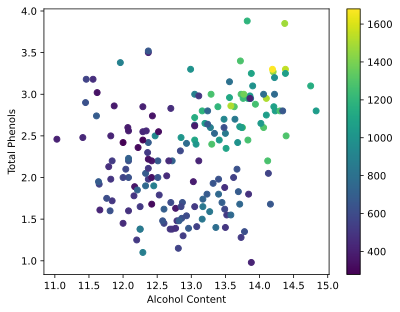

In [249]:
plt.scatter(wine[:,0], wine[:,5], c=wine[:,12])
plt.xlabel('Alcohol Content')
plt.ylabel('Total Phenols')
plt.colorbar();

In the example above, the alcohol content is represented on the $x$-axis, the alkalinity is represented on the $y$-axis, and the proline content is shown using the color of the markers. The spectrum of colors that represent the values is called the *colormap*, and this can be changed using an optional `cmap=` argument. See the [matplotlib colormap page](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html) for a list of available colormaps. 

````{margin}
```{tip}
In the above example, the lighter colors represent the higher values while the darker colors represent the lower values. If you want to reverse the order of the colors, just place `_r` at the end of the colormap name. For example, `cmap='viridis'` becomes `cmap='viridis_r'`.
```
````

The `plt.colorbar()` provides a guide as to the meaning of the colors, but it would be nice to also have a text label on the color bar just like the axes. This can be accomplished by assigning the color bar to a variable and then using the `set_label()` attribute to add a label as demonstrated below.

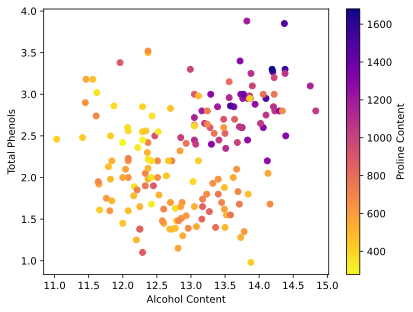

In [250]:
plt.scatter(wine[:,0], wine[:,5], c=wine[:,12], cmap='plasma_r')
plt.xlabel('Alcohol Content')
plt.ylabel('Total Phenols')

cbar = plt.colorbar()
cbar.set_label('Proline Content');

```{index} nuclide stability 
```
```{index} island of stability 
```

As an additional example, we can generate a plot of nuclide atomic numbers versus the number of neutrons and color the markers with the log of the half-life, in years, of each nuclide.

In [251]:
import numpy as np
nuc = np.genfromtxt('data/nuclide.csv', delimiter=',', skip_header=1)
nuc

array([[  0.        ,   1.        ,  -4.71070897],
       [  0.        ,   4.        , -29.25458877],
       [  1.        ,   2.        ,   1.09089879],
       ...,
       [117.        , 176.        ,  -9.35267857],
       [117.        , 177.        ,  -8.79123643],
       [118.        , 176.        , -10.73537861]], shape=(2960, 3))

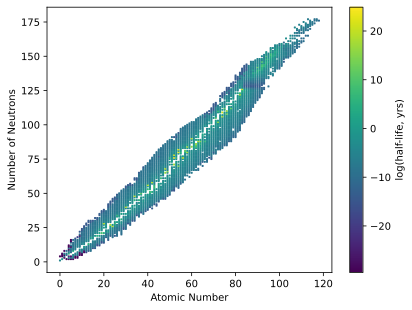

In [252]:
plt.scatter(nuc[:,0], nuc[:,1], s=1, marker='s', c=nuc[:,2], cmap='viridis')
plt.xlabel('Atomic Number')
plt.ylabel('Number of Neutrons')
cbar = plt.colorbar()
cbar.set_label('log(half-life, yrs)');

One of the issues we encounter in the above plot is that the range of half-lives is large with relatively few points in the extreme ends. We can see this in the histogram plot of these log half-life values shown below (see [section 3.2.3](3.2.3)).

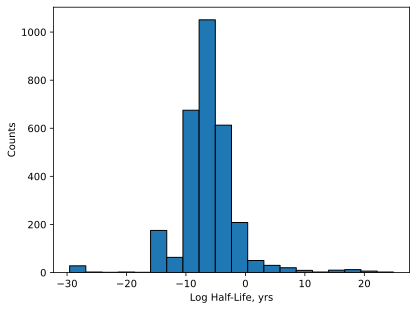

In [253]:
plt.hist(nuc[:,2], bins=20, edgecolor='k')
plt.xlabel('Log Half-Life, yrs')
plt.ylabel('Counts');

In order to prevent the few values at the extremes from effectively washing out the color and making it difficult to see the differences, we can use the `plt.scatter()` arguments `vmax=` and `vmin=` to narrow the colormap range like shown below. By doing this, any values above the `vmax=` value will be a fixed color, and any values below the `vmin=` value will be a fixed color.

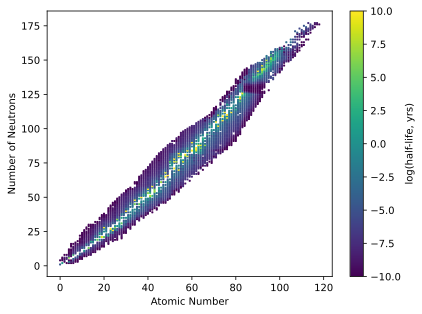

In [254]:
plt.scatter(nuc[:,0], nuc[:,1], s=1, marker='s', c=nuc[:,2], 
            cmap='viridis', vmax=10, vmin=-10)
plt.xlabel('Atomic Number')
plt.ylabel('Number of Neutrons')
cbar = plt.colorbar()
cbar.set_label('log(half-life, yrs)');

```{index} single: plotting; histogram
```
(3.2.3)=
### 3.2.3 Histogram Plots

Histograms display bars representing the frequency of values in a particular dataset. Unlike bar plots, the width of the bars in a histogram plot is meaningful as each bar represents the number of $x$-values that fall within a particular range. A histogram plot can be generated using the `plt.hist()` function which does two things. First, the function takes the data provided and sorts them into equally spaced groups, called *bins*; and second, it plots the totals in each bin. For example, we have a list, `Cp`, of specific heat capacities for various metals in J/g$\cdot^o$C, and we want to visualize the distribution of the specific heat capacities.

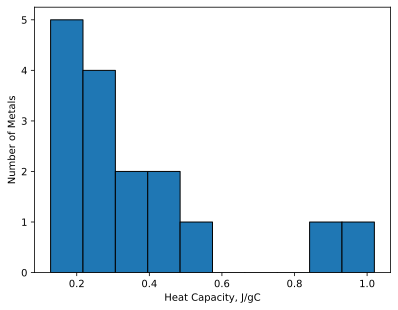

In [255]:
Cp = [0.897, 0.207, 0.231, 0.231, 0.449, 0.385, 0.129, 
      0.412, 0.128, 1.02, 0.140, 0.233, 0.227, 0.523,
      0.134, 0.387]

plt.hist(Cp, bins=10, edgecolor='k')
plt.xlabel('Heat Capacity, J/gC')
plt.ylabel('Number of Metals');

From the plot above, we can see that a large number of heat capacities reside in the area of 0.1-0.5 J/g$\cdot^o$C and none fall in the 0.6-0.8 J/g$\cdot^o$C range. 

The two main arguments for the `plt.hist(data, bins=)` function are `data` and `bins`. The `bins` argument can be either a number of evenly spaced bins in which the data is sorted, like above, or it can be a list of bin edges like below. The function automatically determines which you are providing based on your input.

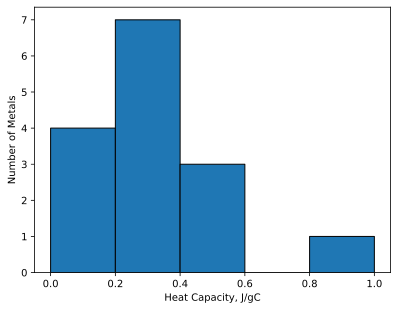

In [256]:
plt.hist(Cp, bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='k')
plt.xlabel('Heat Capacity, J/gC')
plt.ylabel('Number of Metals');

Providing the histogram function bin edges offers far more control to the user, but writing out a list can be tedious. As an alternative, the histogram function also accepts bin edges as `range()` objects. Unfortunately, Python's built-in `range()` function only generates values with integer steps. As an alternative, you can use list comprehension from chapter 2 or use NumPy's `np.arange()` function from [section 4.1.3](4.1.3) which does allow non-integer step sizes.

```{index} single: plotting; stem plot
```
```{index} single: plotting; polar
```
(3.2.4)=
### 3.2.4 Other Plotting Types

There are a variety of other two-dimensional plotting types available in the matplotlib library including stem, step, pie, polar, box plots, and contour plots. Below is a table of a few worth knowing about along with the code that created them. See the matplotlib website for further details. Many Python library websites, including matplotlib’s, contain a gallery page which showcases examples of what can be done with that library. It is recommended to browse these pages when learning a new library.

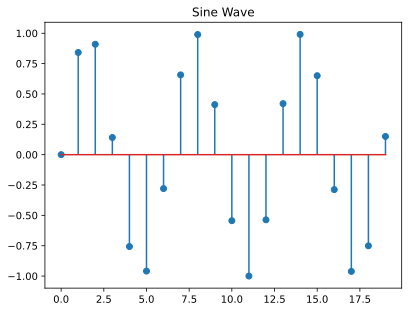

In [257]:
x = range(20)
y = [math.sin(num) for num in x]
plt.stem(x, y)
plt.title('Sine Wave');

```{index} single: plotting; step plot
```

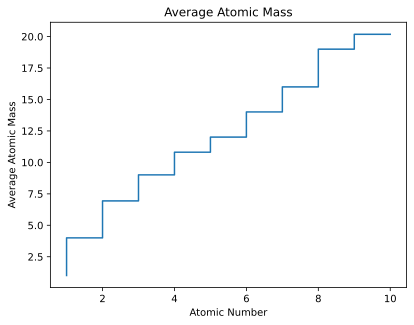

In [258]:
AN = range(1, 11)
mass_avg = [1.01, 4.00, 6.94, 9.01,
10.81, 12.01, 14.01, 16.00, 19.00,
20.18]
plt.step(AN, mass_avg)
plt.title('Average Atomic Mass')
plt.xlabel('Atomic Number')
plt.ylabel('Average Atomic Mass');

```{index} single: plotting; pie plot
```

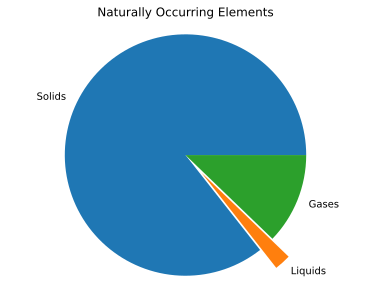

In [259]:
labels = ['Solids', 'Liquids','Gases']
percents = (85.6, 2.2, 12.2)
plt.title('Naturally Occurring Elements')
plt.pie(percents, labels=labels,
explode=(0, 0.2, 0))
plt.axis('equal');

```{index} single: plotting; polar plot
```

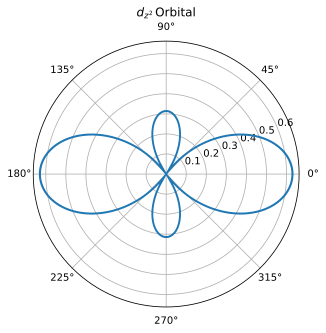

In [260]:
import numpy as np
theta = np.arange(0, 360,0.1)
r = [abs(math.sqrt(5 / (16 * math.pi)) * 
         (3 * math.cos(num)**2 - 1)) for num in theta]
plt.polar(theta, r)
plt.title(r'$d_{z^2} \,$' + 'Orbital');

```{index} single: plotting; overlaying
```
(3.3)=
## 3.3 Overlaying Plots

It is often necessary to plot more than one set of data on the same axes, and this can be accomplished in two ways with matplotlib. The first is to call the plotting function twice in the same Jupyter code cell. Matplotlib will automatically place both plots in the same figure and scale it appropriately to include all data. Below, data for the wave function for the 3p hydrogen orbital is generated similar to the 3s earlier, so now the wave functions for both the 3s and 3p orbitals can be plotted on the same set of axes.

````{margin}
```{tip}
Here we are using more data points to visualize the orbital radial functions because more points give a smoother plot.
```
````

In [261]:
def orbital_3P(r):
    wf = (math.sqrt(6) * r * (4 - (2/3) * r) * math.e**(-r/3))/81
    return wf

r = [num / 4 for num in range(0, 150)]
psi_3p = [orbital_3P(num) for num in r]
psi_3s = [orbital_3S(num) for num in r]

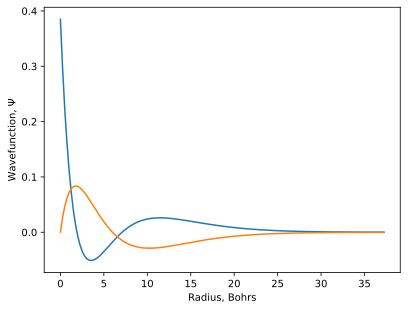

In [262]:
plt.plot(r, psi_3s)
plt.plot(r, psi_3p)
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$');

The second approach is to include both sets of data in the same plotting command as is shown below. Matplotlib will assume that each new non-keyword is a new set of data and that the positional arguments are associated with the most recent data.

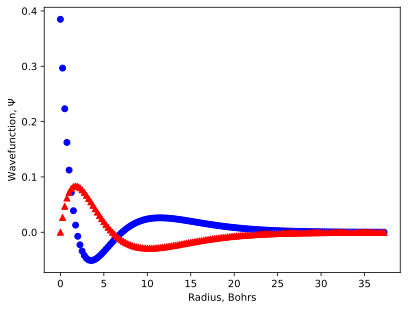

In [263]:
plt.plot(r, psi_3s, 'bo', r, psi_3p,'r^')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$');

In the second plot above, `r`, `psi_3s`, `'bo'` are the data and style for the first set of data while `r`, `psi_3p`,`'r^'` are the data and plotting style for the second.

```{index} legend
```

One issue that quickly arises with multifigure plots is identifying which symbols belong to which data. Matplotlib allows the user to add a legend to the plot. The user first needs to provide a label for each dataset using the `label=` keyword argument. Finally, calling `plt.legend()` causes the labels to be displayed on the plot. The default is for matplotlib to place the legend where it decides is the optimal location, but this behavior can be overridden by adding a keyword `loc=` argument. A complete list of location arguments is available on the [matplotlib website](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html).

It would also be helpful to include a horizontal line at zero as a guide to the eye. Matplotlib includes a `plt.hlines(y, xmin, xmax)` function for just this purpose, and this function takes similar arguments for color and style.

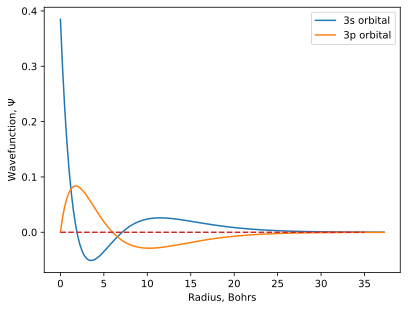

In [264]:
plt.plot(r, psi_3s, label='3s orbital')
plt.plot(r, psi_3p, label='3p orbital')
plt.hlines(0, 0, 35, linestyle='dashed', color='C3')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.legend();

```{index} single: plotting; multifigure
```
(3.4)=
## 3.4 Multifigure Plots

To generate multiple, independent plots in the same figure, a few more lines of code are required to describe the dimensions of the figure and which plot goes where. Once you get used to it, it is fairly logical. There are two general methods for generating multifigure plots outlined below. The first is a little quicker, but the second is certainly more powerful and gives the user access to extra features. Whichever method you choose to adopt, just be aware that you will likely see the other method at times as both are common.

(3.4.1)=
### 3.4.1 First Approach

In the first method, we first need to generate the figure using the `plt.figure()` command. For every subplot, we first need to call `plt.subplot(rows, columns, plot_number)`. The first two values are the number of rows and columns in the figure, and the third number is which subplot you are referring to. For example, we will generate a figure with two plots side-by-side. This is a one-by-two figure (i.e., one row and two columns). Therefore, all subplots will be defined using `plt.subplot(1, 2, plot_number)`. The `plot_number` indicates the subplot with the first subplot being 1 and the second subplot being 2. The numbering always runs left-to-right and top-to-bottom.

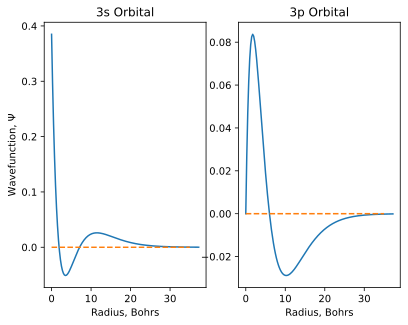

In [265]:
plt.figure()

plt.subplot(1,2,1) # first subplot
plt.plot(r, psi_3s)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.title('3s Orbital')

plt.subplot(1,2,2) # second subplot
plt.plot(r, psi_3p)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3p Orbital');

If you don't like the dimensions of your plot, you can still change them using a `figsize=(width, height)` argument in the `figure()` function like the following.

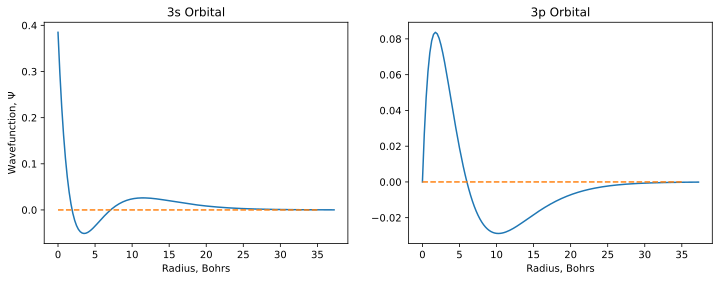

In [266]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1) # first subplot
plt.plot(r, psi_3s)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.ylabel('Wavefunction, $\\Psi$')
plt.title('3s Orbital')

plt.subplot(1,2,2) # second subplot
plt.plot(r, psi_3p)
plt.hlines(0, 0, 35, linestyle='dashed', color='C1')
plt.xlabel('Radius, Bohrs')
plt.title('3p Orbital');

The values in the `plt.subplot()` command may seem redundant. Why are the dimensions for the figure repeatedly defined instead of just once? The answer is that subplots with different dimensions can be created in the same figure (Figure 1). In this example, the top subplot dimension is created as if it were the first subplot in a 2 $\times$ 1 figure. The bottom two subplot dimensions are created as if they are the third and fourth subplots in a 2 $\times$ 2 figure.

![](img/multifigure.svg)

**Figure 1** Multifigure plots with subplots of different dimensions (right) describe each subplot dimension as if it were part of a plot with equally sized subplots (left).

In the following example, dihedral angle data contained in a hydrogenase enzyme from [*Nat. Chem. Biol.* **2016,** 12, 46-50](https://doi.org/10.1038/nchembio.1976) are important and displayed. The top plot shows the relationship between the psi ($\psi$) and phi ($\phi$) angles while the bottom two plots show the distribution of psi and phi angles using histogram plots.

In [267]:
rama = np.genfromtxt('data/hydrogenase_5a4m_phipsi.csv', 
                     delimiter=',', skip_header=1)

psi = rama[:,0]
phi = rama[:,1]

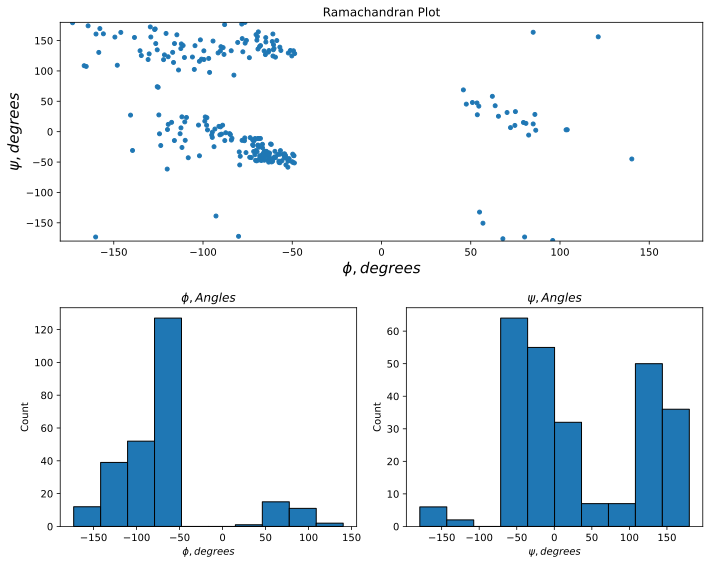

In [268]:
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(phi, psi, '.', markersize=8)
plt.xlim(-180, 180)
plt.ylim(-180, 180)
plt.xlabel('$\\phi, degrees$', fontsize=15)
plt.ylabel('$\\psi, degrees$', fontsize=15)
plt.title('Ramachandran Plot')

plt.subplot(2,2,3)
plt.hist(phi[1:], edgecolor='k')
plt.xlabel('$\\phi, degrees$')
plt.ylabel('Count')
plt.title('$\\phi , Angles$')

plt.subplot(2,2,4)
plt.hist(psi[:-1], edgecolor='k')
plt.xlabel('$\\psi, degrees$')
plt.ylabel('Count')
plt.title('$\\psi , Angles$')

plt.tight_layout();

````{margin}
```{tip}
There are times when the titles and axis labels for multiple subplots will inadvertently overlap. If this happens, simply add `plt.tight_layout()` at the very end to fix this.
```
````

(3.4.2)=
### 3.4.2 Second Approach

The second method is somewhat similar to the first except that it more explicitly creates and links subplots, called axes. To create a figure with subplots, we first need to generate the overall figure using the `plt.figure()` command again, and we also need to attach it to a variable so that we can explicitly assign axes to it. To create each subplot, use the `add_subplot(rows, columns, plot_number)` command. The arguments in the `add_subplot()` command are the same as `plt.subplot()` in [section 3.4.1](3.4.1). After an axis has been created as part of the figure, call your plotting function preceded by the axis variable name as demonstrated below.

One noticeable difference in this method is that the functions for customizing the plots are typically preceded with `set_` such as `set_title()`, `set_xlim()`, or `set_ylabel()`. 

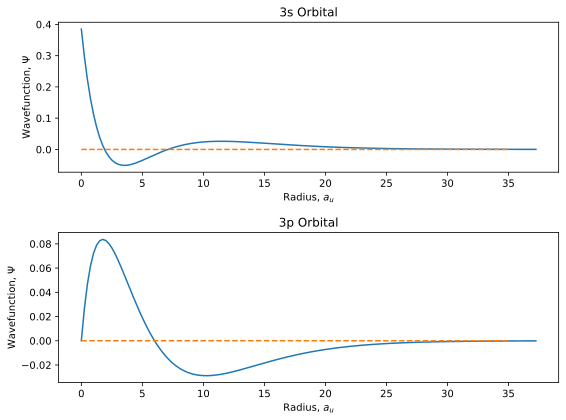

In [269]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(r, psi_3s)
ax1.hlines(0, 0, 35, linestyle='dashed', color='C1')
ax1.set_title('3s Orbital')
ax1.set_xlabel('Radius, $a_u$')
ax1.set_ylabel('Wavefunction, $\\Psi$')


ax2 = fig.add_subplot(2,1,2)
ax2.plot(r, psi_3p)
ax2.hlines(0, 0, 35, linestyle='dashed', color='C1')
ax2.set_title('3p Orbital')
ax2.set_xlabel('Radius, $a_u$')
ax2.set_ylabel('Wavefunction, $\\Psi$')

plt.tight_layout();

```{index} single: plotting; 3D
```
(3.5)=
## 3.5 3D Scatter Plots

To plot in 3D, we will use the approach outlined in [section 3.4.2](3.4.2) with two additions. First, add `from mpl_toolkits.mplot3d import Axes3D ` as shown below. Second, make the plot 3D by adding `projection='3D'` to the `plt.figure()` command. After that, it is analogous to the two-dimensional plots above except $x$, $y$, and $z$ data are provided.

In the following example, we will import $xyz$-coordinates for a C$_{60}$ buckyball molecule and plot the carbon atom positions in 3D.

In [270]:
from mpl_toolkits.mplot3d import Axes3D 

C60 = np.genfromtxt('data/C60.csv', delimiter=',', skip_header=1)
x, y, z = C60[:,0], C60[:,1], C60[:,2]

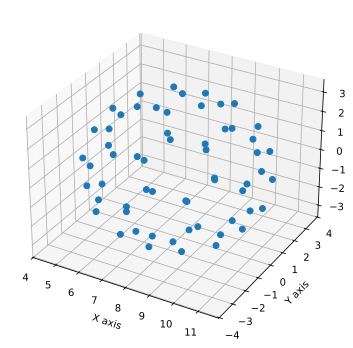

In [271]:
fig = plt.figure(figsize = (10,6))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(x, y, z, 'o')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

```{index} single: plotting; surface plot
```
(3.6)=
## 3.6 Surface & Wireframe Plots


The above 3D plot is simply a scatter plot in a three-dimensional space, but it is often useful to connect these points to describe surfaces in 3D space which can be used for displaying energy surfaces, chemical spectra, or atomic orbital shapes among other applications. We again will import `Axes3D` from `mpl_toolkits.mplot3d` as we did in section [3.5](3.5). When choosing matplotlib functions below, it depends not only on what you want your surface to look like but also on the format of the data. Specifically, your data may be in a grid or $xyz$ format. The section below addresses both scenarios.

```{index} meshgrid
```
(3.6.1)=
### 3.6.1 Gridded Data

If the height data are formatted as a grid, we will need to generate a mesh grid of the $x$- and $y$-axis locations to create a surface plot. Mesh grids are simply the $x$- and $y$-axes values extended into a 2D array. An example is shown below where the $x$- and $y$-axes are integers from 0 $\rightarrow$ 8. In the left grid, the values represent where each point is with respect to the $x$-axis, and the right grid is likewise where each point is located with respect to the $y$-axis.

![](img/xygrid.svg)

We will use NumPy to generate these grids as NumPy arrays. If you have not yet seen NumPy, you can still follow along in this example without understanding how arrays operate, or you can read chapter 4 and come back to this topic later. For those who are familiar with NumPy, being that the two grids/arrays are of the same dimension, all math is done on a position-by-position basis to generate a third array of the same dimensions as the first two. For example, if we were to take the sum of the squares of the two grids above, we would get the following grid.

$$ z = x^2 + y^2 $$

![](img/zgrid.svg)

Notice that each value on the $z$ grid is the sum of the squared values from the equivalent positions on the $x$ and $y$ grids, so for example, the bottom left value is 64 because it is the sum of 64 and 0.

```{index} meshgrid
```

To generate mesh grids, we will use the `np.meshgrid()` function from NumPy. It requires the input of the desired values from the $x$ and $y$ axes as a list, range object, or NumPy array. The output of the `np.meshgrid()` function is two arrays – the $x$-grid and $y$-grid, respectively. 

In [272]:
import numpy as np

x = np.arange(-10, 10)
y = np.arange(-10, 10)

X, Y = np.meshgrid(x, y)
Z = 1 - X**2 - Y**2

Now to plot the surface. We will use the `plot_surface()` function which requires the `X`, `Y`, and `Z` mesh grids as arguments. As an optional argument, you can designate a color map (`cmap`). Color maps are a series of colors or shades of a color that represent values. The default for matplotlib is `viridis`, but you can change this to anything from a wide selection of color maps provided by matplotlib. For more information on color maps, see the [matplotlib website](https://matplotlib.org/stable/gallery/color/colormap_reference.html).

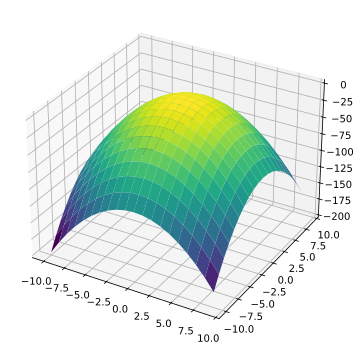

In [273]:
from mpl_toolkits.mplot3d import Axes3D
 
fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis');

```{index} standing wave
```
As a more chemical example, we can plot the standing waves for a 2D particle in a box by the following equation where $n_x$ and $n_y$ are the principal quantum numbers along each axis and $L$ is the length of the box.

$$ \psi(x,y) = (2/L)sin(n_x \pi x/L)sin(n_y \pi y/L) $$

We will select $L$ = 1, $n_x$ = 2, and $n_y$ = 1. Again, a meshgrid is generated and a height value is calculated from the $x$- and $y$-values.

In [274]:
L = 1
nx = 2
ny = 1

x = np.linspace(0, L, 20)
y = np.linspace(0, L, 20)
X, Y = np.meshgrid(x,y)

def wave(x, y, nx, ny):
    psi = (2/L) * np.sin(nx*np.pi*X/L) * np.sin(ny*np.pi*Y/L)
    return psi

Z = wave(x, y, nx, ny)

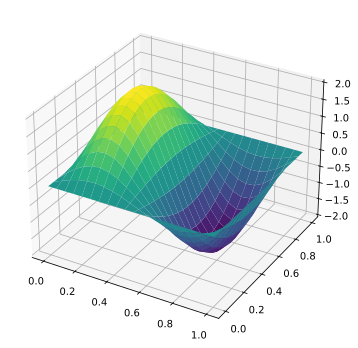

In [275]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis');

You are encouraged to increase the values for $n_x$ and $n_y$ and see how the surface plot changes.

Alternatively, a surface can be represented with a wireframe using the `plt.plot_wireframe()` function which operates similarly to the `plt.plot_surface()` function.

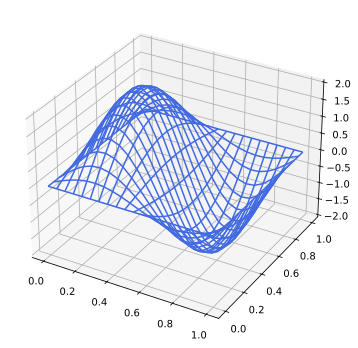

In [276]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, linewidths=1.5, colors='royalblue');

(3.6.2)=
### 3.6.2 Trigonal Plots

If the data are formatted as three columns containing $x$, $y$, and $z$ values, matplotlib provides a triangulated grid function, `plt.plot_trisurf()`, that can work with these data. Because the function cannot guarantee that the data points are arranged in rectangular grids, the surface mesh is instead composed of triangular faces. The function takes the $x$, $y$, and $z$ values as the required arguments. As an example, the data from the above standing wave are repacked below as a series of $xyz$ vector coordinates and plotted using the `plt.plot_trisurface()`.

In [277]:
# repack data in xyz vectors for example
wave_d = np.dstack((X, Y, Z))
wave_xyz = []
for layer in wave_d:
    for vect in layer:
        wave_xyz.append(vect)

wave_xyz = np.array(wave_xyz)

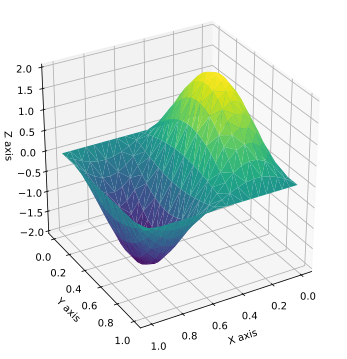

In [278]:
x, y, z = wave_xyz[:,0], wave_xyz[:,1], wave_xyz[:,2]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1, projection='3d', )
ax.plot_trisurf(x, y, z, cmap='viridis')

# adjusts view
ax.view_init(azim=60, elev=30)
# prevents z label from being cut off
ax.set_box_aspect(aspect=(1,1,1))

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis');

```{index} single: plotting; 3D surface plot
```
(3.6.3)=
### 3.6.3 3D Surfaces

Matplotlib supports the ability to plot 3D surfaces and wireframes which is useful for molecular orbitals among other applications. We will start with a basic sphere and then morph it into the angular component of an atomic orbital. We are going to again use the `plt.plot_surface()` and `plt.plot_wireframe()` functions, so we first need a mesh grid using the `np.meshgrid()` function to yield the theta ($\theta$) and phi ($\phi$) values. There are multiple conventions for these angles, but here we will follow the [SciPy convention](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.sph_harm_y.html#scipy.special.sph_harm_y) which treats phi as the azimuthal angle (i.e., direction on the *xy*-plane) and theta as the polar angle (i.e., angle off the positive *z*-axis). The values for phi do a full circle, ranging from 0 $\rightarrow$ 2$\pi$, while theta here swings from the north pole to the south pole, ranging from 0 $\rightarrow$ $\pi$. These angles are then converted to *xyz*-coordinates using the trigonometric equations shown below. In this example, we are plotting a unit sphere, so r = 1. Finally, the *x*, *y*, and *z* values are provided to either the `plt.plot_surface()` or `plt.plot_wireframe()` functions to plot a sphere. It is important here to set the aspect ratio to `equal` using `ax.set_aspect('equal')` so that equal changes in value are represented with equal distances along all axes. Otherwise, the *z*-axis will be compressed here making the sphere look squished or oblate.

$$ x = r \, sin(\theta) \, sin(\phi) $$
$$ y = r \, sin(\theta) \, cos(\phi) $$
$$ z = r \, cos(\theta) $$

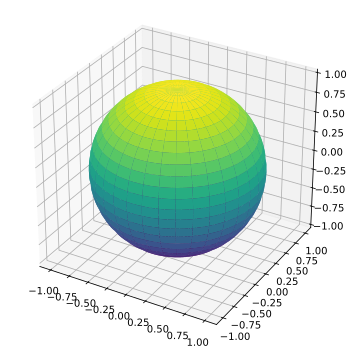

In [279]:
# generate mesh grid of theta and phi angles
th, ph = np.meshgrid(np.linspace(0, np.pi, 51),
                     np.linspace(0, 2 * np.pi, 101))

# convert angles to xyz coordinates for r = 1
x = np.sin(th) * np.sin(ph)
y = np.sin(th) * np.cos(ph)
z = np.cos(th)

# plotting
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.set_aspect('equal') # sets aspect ratio to equal

```{index} single: orbitals; 3D plotting
```
To plot orbital angular components, we can modify or warp our sphere by multiplying the *xyz*-coordinates by the orbital's angular wave function. We are essentially changing the radius at different angles in the trigonometric equations above. For example, below is the angular wave function for the $d_{z^2}$ orbital.

$$ Y_{d_{d^2}} = \left(\frac{5}{16\pi} \right)^{1/2} (3 \, cos^2 \, \theta - 1) $$

````{margin}
```{warning}
The plot of angular wave function does **not** include the radial information, so it does not fully describe the shape of atomic orbitals. Do not interpret the angular plots below as the actual shapes of atomic orbitals.
```
````

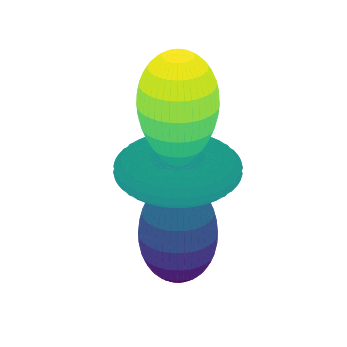

In [280]:
# multiply xyz values by angular wave function
dz2 = np.sqrt((5 / 16) * np.pi) * (3 * np.cos(th)**2 - 1)
X, Y, Z = x * dz2, y * dz2, z * dz2

# plotting
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_aspect('equal') # sets aspect ratio to equal
ax.set_axis_off() # turns off axes and background

While the angular wave functions can be coded manually, the SciPy library includes a [spherical harmonics](https://docs.scipy.org/doc/scipy-1.16.0/reference/generated/scipy.special.sph_harm_y.html) `sph_harm_y(l, m, theta, phi)` function that will calculate the angular wave function for any combination of the angular ($l$) and magnetic ($m_l$) quantum numbers. We only want the positive, real results, so we will take the absolute value of the real component.

````{margin}
```{note}
For $m_l$ values other than zero, you can select only the real or only the imaginary component to plot using `f = np.abs(harm.real)` or `f = np.abs(harm.imag)`.
```
````

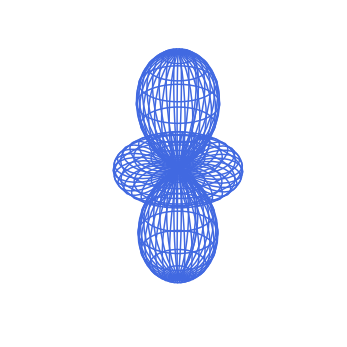

In [281]:
from scipy.special import sph_harm_y

# calculate spherical harmonic
l, m = 2, 0
harm = sph_harm_y(l, m, th, ph)
f = np.abs(harm)

# multiply xyz values by wave function
X, Y, Z = x * f, y * f, z * f

# plotting
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot_wireframe(X, Y, Z, colors='royalblue')
ax.set_aspect('equal') # sets aspect ratio to equal
ax.set_axis_off() # turns off axes and background

```{index} single: plotting; 3D on 2D surface
```
(3.7)=
## 3.7 3D Data on a 2D Surface 

There are times when it is useful to represent 3D data on a 2D surface, requiring the third dimension to be represented by color or contour lines. This can be useful for representing an energy surface, 3D fluorescence spectra, where the $x$- and $y$-axes are absorption and emission wavelengths, or 2D NMR spectra. This section demonstrates a number of plotting functions in matplotlib to generate 2D histograms and contour plots.

(3.7.1)=
### 3.7.1 2D Histograms

The first plot we will cover is the 2D histogram. This is similar to the standard histogram except that the bins are 2D and the quantity in a bin is represented by color instead of a bar height. There are two functions available in matplotlib for this task listed below. Each of these functions requires the $x$- and $y$-coordinates as the two required arguments, and like the previously seen histogram function, these functions total the counts in each bin for the user. For this example, we will again use the Ramachandran data from [section 3.4.1](3.4.1).

~~~python
plt.hist2d(x, y)
plt.hexbin(x, y)
~~~

The `plt.hist2d()` function, like the regular histogram function, can accept additional arguments such as the number or position of the bins (`bins=`) or minimum or maximum values for bins to be displayed (`cmin=` and `cmax=`, respectively). In the example below, there are 50 bins on each axis, and any bin with fewer than 1 count is not displayed.

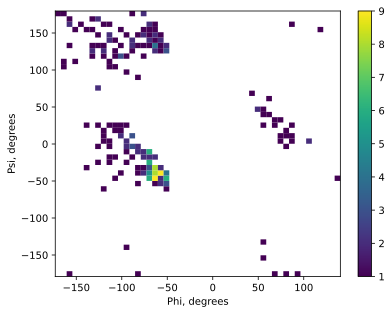

In [282]:
plt.hist2d(phi, psi, bins=50, cmin=1)
plt.xlabel('Phi, degrees')
plt.ylabel('Psi, degrees')
plt.colorbar();

The `plt.hexbin()` function in its basic form is like the `plt.hist2d()` function except that the bins are hexagons instead of rectangles.

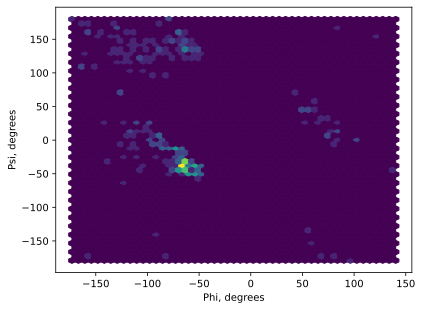

In [283]:
plt.hexbin(phi, psi, gridsize=50, vmax=10)
plt.xlabel('Phi, degrees')
plt.ylabel('Psi, degrees');

```{index} single: plotting; contour
```
(3.7.2)=
### 3.7.2 Contour Plots

We will next look at contour plots which show the $z$ values using color or lines. When lines are used, this is similar to a topographic map where the closer the lines, the steeper the change in $z$ values. The lines are also colored to show the values. Like plotting 3D surfaces in [section 3.6](3.6), the data may be represented as either three grids or a series of $xyz$ values. 

For our gridded example, we will again visualize our standing wave function from [section 3.6](3.6). The `plt.contour()` plot accepts x, y, and z grids as the required arguments, but it can also accept the number of levels (`levels=`) and a colormap (`cmap=`).

In [284]:
L = 1
nx = 2
ny = 1

x = np.linspace(0, L, 20)
y = np.linspace(0, L, 20)
X, Y = np.meshgrid(x,y)

def wave(x, y):
    psi = (2/L) * np.sin(nx*np.pi*X/L) * np.sin(ny*np.pi*Y/L)
    return psi

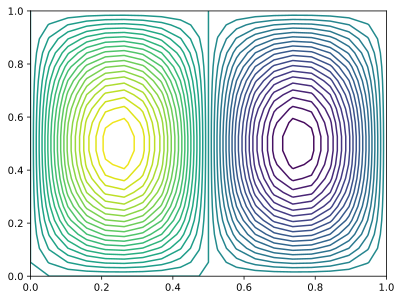

In [285]:
plt.contour(X, Y, wave(X, Y), cmap='viridis', levels=40);

We can also generate a contour plot where the space between the lines is filled using the `plt.contourf()` function. The "f" is for "filled".

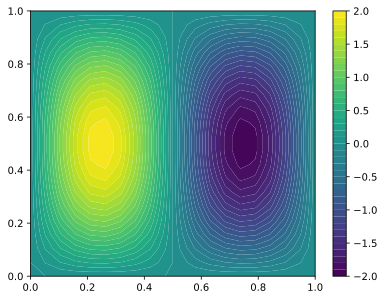

In [286]:
plt.contourf(X, Y, wave(X, Y), cmap='viridis', levels=40)
plt.colorbar();

```{index} single: plotting; 2D NMR spectrum
```
```{index} single: NMR; plot COSY
```
If the data are in $xyz$ coordinate format, we will instead use the `plt.tricontour()` or `plt.tricontourf()` functions as demonstrated below with COSY NMR data of quinine.

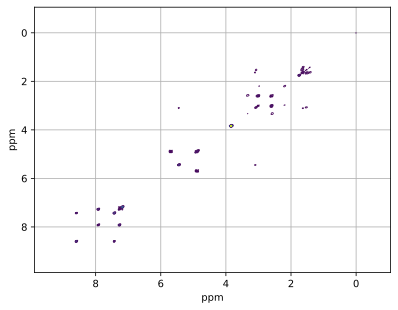

In [287]:
COSY = np.genfromtxt('data/Quinine_CDCl3_COSY.csv', delimiter=',', skip_header=1)
x, y, z = COSY[:,0], COSY[:,1], COSY[:,2]

plt.tricontour(x, y, z, levels=100, linewidths=0.8)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('ppm')
plt.ylabel('ppm')
plt.grid(which='major');

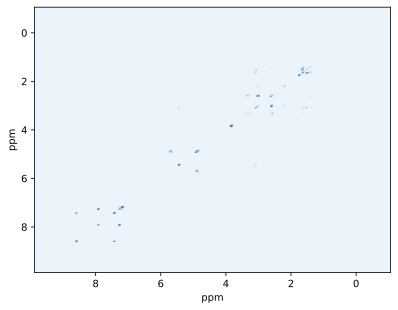

In [288]:
plt.tricontourf(x, y, z, levels=200, vmax=0.05, cmap='Blues')
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('ppm')
plt.ylabel('ppm');

As a final example, it is possible to merge a contour plot with a line plot. This is useful for representing 2D NMR spectra such as COSY NMR, where the COSY NMR data is represented by the contour plot while the $^1$H NMR spectrum is located on the margins of the contour plot. Below, a function `plot_2d_nmr()` is defined (click *Show code cell source*) to generate such a plot.

In [289]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def plot_2d_nmr(main, marg, limits=None, levels=50, linewidths=1.0, grayscale=False):
    '''Generates a 2D contour plot with marginal plots running along the axes.

    Parameters
    ----------

    main : array-like, shape (1,3)
        xyz values for contour plot
        
    marg : array-like, shape (1,2)
        xy values for marginal plots

    limits : array-like, shape (1,2)
        max and min values

    levels : integer
        contour levels

    linewidths : float
        linewidths for contour and marginal plots

    grayscale : boolean
        all lines are grayscale or black if True
    
    '''

    x_main, y_main, z_main = main
    x_axis, y_axis = marg

    if grayscale:
        cmap = 'Greys_r'
        color = 'k'
    else:
        cmap = 'viridis'
        color = 'C0'

    # generate main contour plot
    fig, ax_main = plt.subplots(figsize=(12,12))
    ax_main.tricontour(x_main, y_main, z_main, levels=levels, linewidths=linewidths, cmap=cmap)
    ax_main.grid()
    ax_main.set_xlabel('ppm')
    ax_main.set_ylabel('ppm')

    if limits == None:    
        ax_main.invert_xaxis()
        ax_main.invert_yaxis()
    else:    
        ax_main.set_ylim(*limits)
        ax_main.set_xlim(*limits)
    
    # generate marginal plots along the axes
    divider = make_axes_locatable(ax_main)
    
    ax_margx = divider.append_axes('top', 2, pad=0.1 , sharex=ax_main)
    ax_margy = divider.append_axes('right', 2, pad=0.1 , sharey=ax_main)
    
    ax_margx.plot(x_axis, y_axis, linewidth=linewidths, color=color)
    ax_margy.plot(y_axis, x_axis, linewidth=linewidths, color=color)
    
    # disable boxes and axes on marginal plots
    ax_margx.axis('off')
    ax_margy.axis('off') 

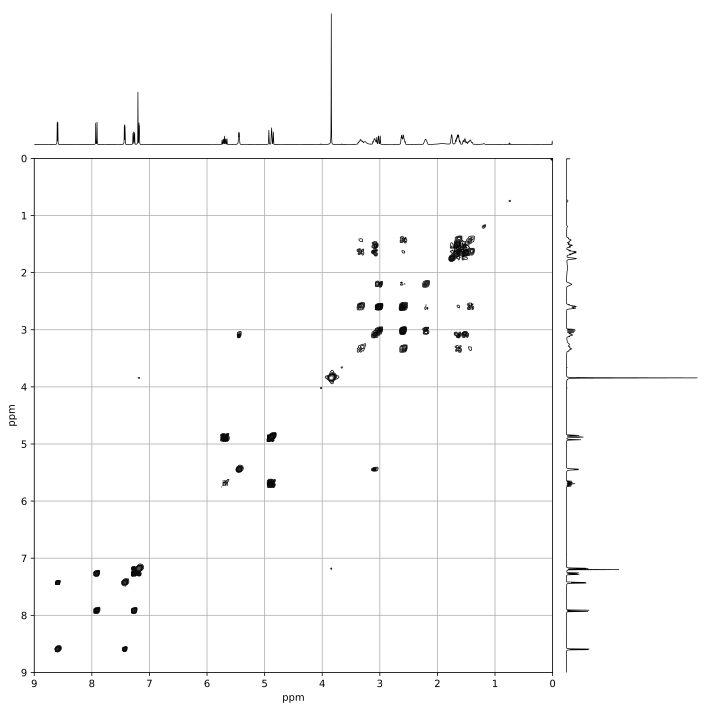

In [290]:
proton = np.genfromtxt('data/Quinine_CDCl3_1HNMR.csv', delimiter=',', skip_header=1)
cosy = np.genfromtxt('data/Quinine_CDCl3_COSY.csv', delimiter=',', skip_header=1)

plot_2d_nmr((cosy[:,0], cosy[:,1], cosy[:,2]), (proton[:,0], proton[:,1]), 
            limits=(9,0), levels=300, linewidths=0.7, grayscale=True)

(fr03)=
## Further Reading

The matplotlib website is an excellent place to learn more about plotting in Python. Similar to some other Python library websites, there is a gallery page that showcases many of the capabilities of the matplotlib library. It is often worth browsing to get ideas and a sense of what the library can do. The matplotlib website also provides free cheat sheets summarizing key features and functions.

1. Matplotlib Website. [https://matplotlib.org](https://matplotlib.org/) (free resource)
2. Matplotlib Cheatsheets [https://matplotlib.org/cheatsheets/](https://matplotlib.org/cheatsheets/) (free resource)
3. VanderPlas, J. Python data Science Handbook: Essential Tools for Working with Data, 1st ed.; O’Reilly: Sebastopol, CA, 2017, chapter 4. Freely available from the author at [https://jakevdp.github.io/PythonDataScienceHandbook/](https://jakevdp.github.io/PythonDataScienceHandbook/) (free resource)
4. Matplotlib Colormap Reference [https://matplotlib.org/stable/gallery/color/colormap_reference.html](https://matplotlib.org/stable/gallery/color/colormap_reference.html) (free resource)
5. Matplotlib Marker Reference [https://matplotlib.org/stable/api/markers_api.html](https://matplotlib.org/stable/api/markers_api.html) (free resource)


## Exercises

Complete the following exercises in a Jupyter notebook using the matplotlib library and be sure to **label axes and include units** when appropriate. Any data file(s) referred to in the problems can be found in the [data](https://github.com/weisscharlesj/SciCompforChemists/tree/master/notebooks) folder in the same directory as this chapter's Jupyter notebook. Alternatively, you can download a zip file of the data for this chapter from [here](https://github.com/weisscharlesj/data_SciCompforChem) by selecting the appropriate chapter file and then clicking the **Download** button.

1. Visualize the relationship between pressure and volume for 1.00 mol of He(g) at 298 K in an expandable vessel as it increases from 1 L $\rightarrow$ 20 L. R = 0.08206 L·atm/mol·K. This will require you to generate values and perform the calculation using the equation below.

    $$ PV = nRT  $$
    
2. Plot the electronegativity versus atomic number for the first five halogens, and make
the size or color of the markers based on the atomic radii of the element.
You will need to look up the values which should be available in most general chemistry textbooks. If you do not have one available, you can also find these values in the free, open chemistry textbook available on [OpenStax](https://openstax.org/) among other online resources.

3. The following functions are an example of the sandwich theorem which aids in determining limits of function $g(x)$ by knowing its range is between $f(x)$ and $h(x)$ in the relevant domain. Plot all three functions on the same axes to show that f(x) $\leq$ g(x) $\leq$ h(x) for x of -50 $\rightarrow$ 50. Be sure to include a legend.

    $$ f(x) = x^2 \quad g(x) = x^2 sin(x) \quad h(x) = -x^2 $$

4. Plot the concentration of A with respect to time for the following elementary step if $k$
= 0.12 M$^{-1}$s$^{-1}$ using the appropriate integrated rate law. 

    $$ 2 A \rightarrow P $$
    
    ```{index} gas chromatography
    ```

5. Import the **gc_trace.csv** file containing a gas chromatography (GC) trace and plot the intensity (*y*-axis) versus time (*x*-axis) using a line plot. Be sure to label the axes.

6. Import the mass spectra file **ms_bromobenzene.csv** and visualize it using a stem plot where *m/z* is on the *x*-axis and intensity is on the *y*-axis. Hint: the dots on the top of the lines can be removed using `markerfmt='None'`.

7. Earth's atmosphere is composed of 78% N$_2$, 21% O$_2$, and 1% other gases. Represent this data with a pie chart, and make the last 1% slice stick out of the pie like in [section 3.2.4](3.2.4).

8. Create a histogram plot to examine the distribution of values generated below.
        
    ~~~python
    import random
    rdn = [random.random() for value in range(1000)]
    ~~~

9. The $^1$H NMR spectrum of caffeine in CDCl$_3$ is composed of four singlets with the following chemical shifts and relative intensities. Visualize this data using a [stem plot](3.2.4). Hint: the dots on the top of the lines can be removed using `markerfmt='None'`.

    ~~~python
    ppm = [7.52, 4.00, 3.60, 3.44]
    intensity = [1.52, 3.90, 5.74, 5.78]
    ~~~



10. The following table presents the calculated free energies for each step in the binding and splitting of H$_2$(g) by a nickel phosphine catalyst. Visualize the energies over the course of the reaction using a plotting type other than a line or scatter plot. Data from [*Inorg. Chem.* **2016,** 55, 445−460](https://doi.org/10.1021/acs.inorgchem.5b02262).

    | Step  |  Relative Free Energy (kcal/mol) |
    |:-----:|:--------------------------------:|
    |   1   |           0.0                    |
    |   2   |           11.6                   |
    |   3   |           9.8                    |
    |   4   |           13.4                   |
    |   5   |           5.8                    |
    |   6   |           8.3                    |
    |   7   |           2.7                    |

11. Generate two side-by-side plots that show the atomic radii and first ionization energies versus atomic number for the first ten elements on the periodic table. This data should be available on the internet or any general chemistry textbook, including [OpenStax](https://openstax.org/) in the periodic trends chapter. Include titles on both plots along with appropriate axis labels.

12. Generate a standing wave surface plot (similar to the one at the end of [section 3.6](3.6)) using the following equation and parameters: $L$ = 1, $n_x$ = 2, $n_y$ = 2.

    $$ \Psi(x,y) = (2/L) \, sin(n_x\pi x/L) \, sin(n_y \pi / L) $$
    
13. Load the **amine_bp.csv** file in the data folder which contains the boiling points of primary, secondary, and tertiary amines and the number of carbons in each amine. Plot the boiling point ($x$-axis) versus number of carbons ($y$-axis) for each degree of amine. Your plot should have three distinct trends, one for each degree, represented both in different colors and with different markers. Include a legend on your plot indicating which data points represent which degree of amine.

14. Visualize the angular component of a *d*-orbital other than $d_{z^2}$ and identify which *d*-orbital you visualized the angular component for. You will need to find a [table of the real components of spherical harmonics](https://en.wikipedia.org/wiki/Table_of_spherical_harmonics#Real_spherical_harmonics) for this task.